# 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
from random import seed

# Set seed for reproducibility
SEED = 1122334455
seed(SEED)
np.random.seed(SEED)

#Import science plotter
import sys
sys.path.insert(1, '/home/ptr@itd.local/code/fairness_triangle/tools')

from plot_helper import science_fig


# 2. Function Definitions

In [2]:
def generate_data(mean_in, cov_in, n_samples, class_label):
    """
    Generates samples from a multivariate normal distribution.

    Parameters:
    - mean_in: array-like, mean vector of the distribution
    - cov_in: array-like, covariance matrix
    - n_samples: int, number of samples to generate
    - class_label: label to assign to all generated samples

    Returns:
    - nv: the multivariate normal object
    - X: generated samples (n_samples x 2)
    - y: array of labels (all equal to class_label)
    """
    nv = multivariate_normal(mean=mean_in, cov=cov_in)
    X = nv.rvs(n_samples)
    y = np.ones(n_samples, dtype=float) * class_label
    return nv, X, y

def plot_cov_ellipse(cov, mean, ax, n_std=1.0, edgecolor='black', **kwargs):
    """
    Plots an ellipse representing the covariance of a distribution.

    Parameters:
    - cov: covariance matrix
    - mean: mean vector
    - ax: matplotlib axis to plot on
    - n_std: number of standard deviations
    - edgecolor: color of the ellipse edge
    - kwargs: additional arguments for the Ellipse
    """
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]

    angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvals)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=edgecolor, facecolor='none', lw=1.6, **kwargs)
    ax.add_patch(ellipse)

def compute_signed_distance_to_boundary(x0, y0, w, b):
    """
    Computes the signed distance from a point to the decision boundary.

    Positive if on Class 1 side, negative if on Class 0 side.

    Parameters:
    - x0: x-coordinate of the point
    - y0: y-coordinate of the point
    - w: weight vector of the linear boundary
    - b: bias term

    Returns:
    - distance: signed distance from point to boundary
    """
    numerator = w[0] * x0 + w[1] * y0 + b
    denominator = np.linalg.norm(w)
    distance = numerator / denominator
    return distance

# 3. Configuration

In [3]:
# Class 1 parameters
mean1 = np.array([2, 2])
covar1 = np.array([[5, 1],
                   [1, 5]])

# Class 0 parameters
mean2 = np.array([-2, -2])
covar2 = np.array([[10, 1],
                   [1, 3]])

n_samples_per_class = 150

# 4. Data Generation

In [4]:
_, X1, y1 = generate_data(mean1, covar1, n_samples_per_class, class_label=1)
_, X0, y0 = generate_data(mean2, covar2, n_samples_per_class, class_label=0)

# Combine data
X = np.vstack((X1, X0))
y = np.hstack((y1, y0))

# 5. Decision Boundary Calculation

In [5]:
# Average covariance assumption
covar_avg = (covar1 + covar2) / 2
inv_covar_avg = np.linalg.inv(covar_avg)

w = inv_covar_avg @ (mean1 - mean2)
b = -0.5 * (mean1 + mean2) @ inv_covar_avg @ (mean1 - mean2)

# Create a grid for plotting decision boundary
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
y_vals = -(w[0] * x_vals + b) / w[1]


In [11]:
b

0.0

# 6. Visualization

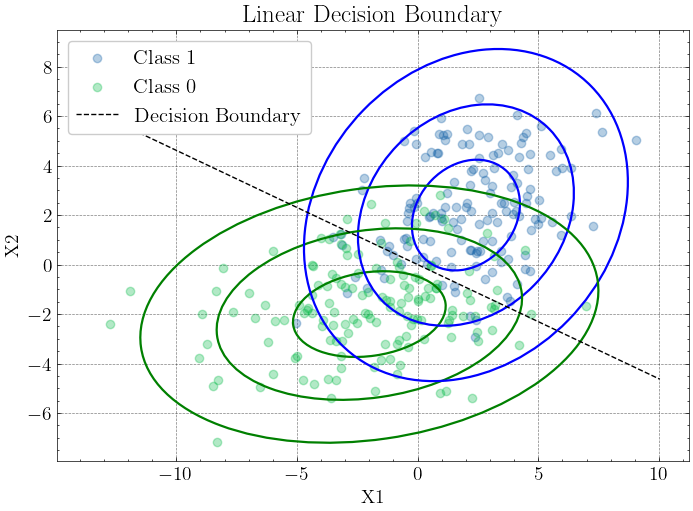

In [6]:
fig = science_fig()
ax = fig.gca()

# Scatter plots
ax.scatter(X1[:, 0], X1[:, 1], label='Class 1', alpha=0.3)
ax.scatter(X0[:, 0], X0[:, 1], label='Class 0', alpha=0.3)

# Covariance ellipses (1σ, 2σ, 3σ)
for n_std in [1, 2, 3]:
    plot_cov_ellipse(covar1, mean1, ax, n_std=n_std, edgecolor='blue')
    plot_cov_ellipse(covar2, mean2, ax, n_std=n_std, edgecolor='green')

# Decision boundary
ax.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# Plot settings
ax.set_title('Linear Decision Boundary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.legend(loc='upper left')
ax.grid(True)
fig.tight_layout()
plt.show()


In [7]:
def compute_signed_distance_to_boundary(x0, y0, w, b):
    """
    Computes the signed distance from point (x0, y0) to the decision boundary w^T x + b = 0.
    
    Positive if on Class 1 side, negative if on Class 0 side.
    """
    numerator = w[0] * x0 + w[1] * y0 + b
    denominator = np.linalg.norm(w)
    distance = numerator / denominator
    return distance

In [8]:
x0=10
y0=-5
abs(compute_signed_distance_to_boundary(x0, y0, w, b))


0.34921514788478847

In [9]:
b

0.0